In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Leitura dos dados de (1)
df = pd.read_csv("https://dcm.ffclrp.usp.br/~rrosales/aulas/orto.txt", sep=r"\s+")

In [81]:
# Informações gerais dos dados
print(f"Shape: {df.shape}")
print(df.info())

Shape: (15, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Paciente      15 non-null     int64 
 1   Fisioterapia  15 non-null     int64 
 2   Sequelas      15 non-null     object
 3   Cirugia       15 non-null     object
dtypes: int64(2), object(2)
memory usage: 612.0+ bytes
None


In [82]:
# Pequena visão dos dados
df.head()

,Paciente,Fisioterapia,Sequelas,Cirugia
0,1,7,S,A
1,2,8,S,M
2,3,5,N,A
3,4,6,N,M
4,5,4,N,M


In [83]:
# Limpeza e tratamento dos dados. Para essa análise, a coluna Paciente não será necessária
df = df.drop(columns=["Paciente"])
df.columns = df.columns.str.lower()
df.rename(columns={"fisioterapia": "meses_fisioterapia", "cirugia" : "cirurgia"}, inplace=True)

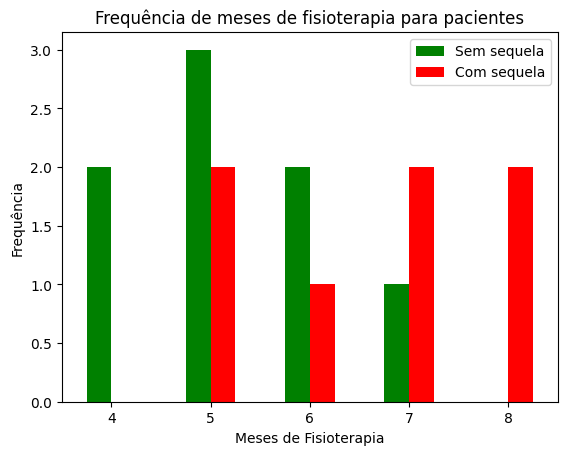

In [84]:
# (1.i) Frequência de meses de Fisioterapia para pacientes COM e SEM sequelas
freq = pd.crosstab(df['meses_fisioterapia'], df['sequelas'])
freq.plot(kind="bar", color=["green", "red"])
plt.title("Frequência de meses de fisioterapia para pacientes")
plt.xlabel("Meses de Fisioterapia")
plt.xticks(rotation=0)
plt.ylabel("Frequência")
plt.legend(["Sem sequela", "Com sequela"])
plt.show()

# Podemos concluir uma tendência de a variável meses de fisioterapia assumir valores mais altos e com maior frequência em pacientes que ficaram COM SEQUELAS após o tratamento.

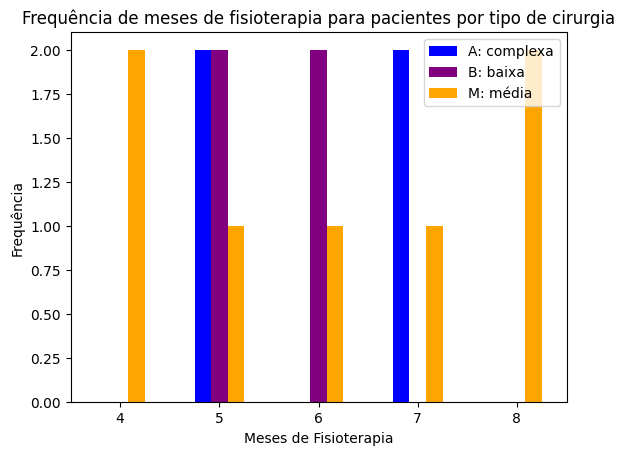

In [85]:
# (1.ii) Frequência de meses de Fisioterapia para pacientes por tipo de cirurgia
freq = pd.crosstab(df['meses_fisioterapia'], df['cirurgia'])
freq.plot(kind="bar", color=["blue", "purple", "orange"])
plt.title("Frequência de meses de fisioterapia para pacientes por tipo de cirurgia")
plt.xlabel("Meses de Fisioterapia")
plt.xticks(rotation=0)
plt.ylabel("Frequência")
plt.legend(["A: complexa", "B: baixa", "M: média"])
plt.show()

# Por ter poucos dados, não podemos obter uma conclusão clara, mas o gráfico indica uma tendência baixa de meses de fisioterapia para cirurgias de baixa complexidade (até 6 meses),
# média para as de alta complexidade (até 7 meses), e variada para as de média complexidade (de 4 a 8 meses)

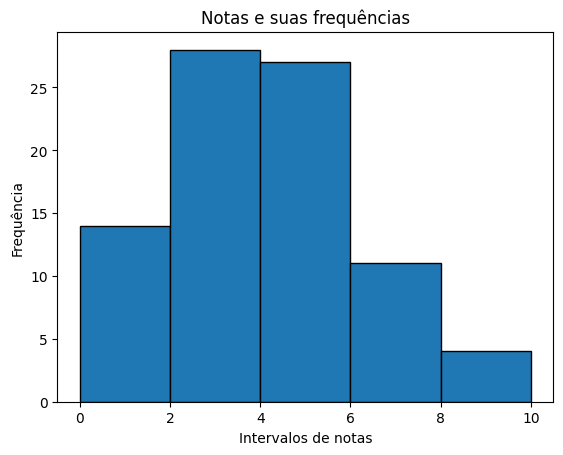

In [86]:
# (2.i) Histograma para notas de uma turma de acordo com intervalos e frequências definidas
intervalos = [0, 2, 4, 6, 8, 10]
frequencias = [14, 28, 27, 11, 4]

# Pontos médios
pontos_medios = [(intervalos[i] + intervalos[i+1])/2 for i in range(len(intervalos)-1)]

# Criar vetor com contagens individuais
dados = np.repeat(pontos_medios, frequencias)

# Plotagem do histograma
plt.hist(dados, bins=intervalos, edgecolor='black')
plt.xlabel("Intervalos de notas")
plt.ylabel("Frequência")
plt.title("Notas e suas frequências")
plt.show()

# (2.ii) Considerando uma nota de aprovação igual a 5, quantos alunos foram aprovados?
# Considerando que metade dos alunos no intervalo [4, 6] tiraram nota 5, teremos: 14 + 11 + 4 = 29 alunos, ou 29/84 = aprox. 35% do total de alunos.

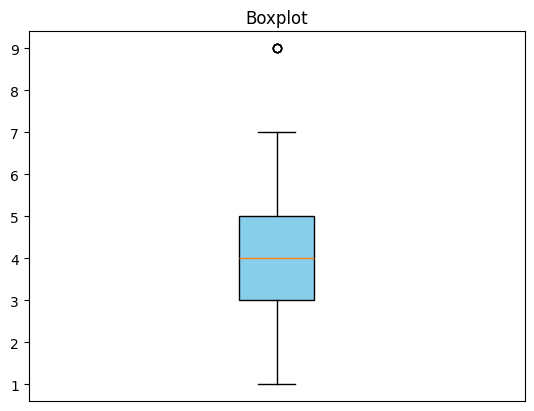

In [87]:
# (2.iii) Boxplot do conjunto de notas
plt.boxplot(dados, vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title("Boxplot")
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [88]:
# Leitura dos dados de (3)
df = pd.read_csv("https://dcm.ffclrp.usp.br/~rrosales/aulas/cancer.txt", comment="#", sep=r"\s+")

#
#  Descricao das variaveis
#
#	coluna 1: Identificacao do paciente.
#	coluna 2: Diagnostico:
#		1 = Falso-negativo: diagnosticados como nao tendo a
#			doenca quando na verdade a tinham.
#		2 = Negativo: diagnosticados como nao tendo a doenca
#			quando de fato nao nao a tinham.
#		3 = Positivo: diagnosticados corretamente como tendo a doenca.
#		4=Falso-positivo: diagnosticados como tendo a doença quando na
#			verdade nao tinham.
#	coluna 3: Idade.
#	coluna 4: Espectro quimico da analise do sangue-alkaliine phosphatose (AKP).
#	coluna 5: Concentracao de fosfato no sangue (P).
#	coluna 6: Enzima, lactate dehydrogenase (LDH).
#	coluna 7: Albumina (ALB).
#	coluna 8: Nitrogenio na ureia (N).
#	coluna 9: Glicose (GL).
#

In [89]:
# Informações gerais dos dados
print(f"Shape: {df.shape}")
print(df.info())

Shape: (362, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ident   362 non-null    int64  
 1   Grupo   362 non-null    int64  
 2   Idade   362 non-null    int64  
 3   AKP     362 non-null    float64
 4   P       362 non-null    float64
 5   LDH     362 non-null    float64
 6   ALB     362 non-null    int64  
 7   N       362 non-null    int64  
 8   GL      362 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 25.6 KB
None


In [90]:
# Pequena visão dos dados
print(df.head())
print(df.sample(10))

   Ident  Grupo  Idade   AKP    P   LDH  ALB   N   GL
0      1      1     71   8.0  3.2   7.8   62   6  113
1      2      1     66  10.5  5.1  50.1   57   9   93
2      3      1     83   8.5  3.3  15.3   53  21  109
3      4      1     52  12.8  3.2  18.8   45  14   91
4      5      1     61   7.4  4.3  12.9   69  19   78
     Ident  Grupo  Idade   AKP    P   LDH  ALB   N   GL
158    159      2     38   9.7  3.2  12.7   61  15  102
145    146      2     30   9.0  3.3  12.0   60  15   89
321    322      4     49   8.7  2.7  15.4   63  16  110
5        6      1     54   8.1  2.7  15.9   57  10  122
194    195      2     38   5.4  3.0  13.4   63  11   87
285    286      3     63   8.6  3.3  29.7   51  18  117
227    228      3     46  19.3  3.6  59.4   52  18  202
335    336      4     56  10.6  3.5  12.6   62  10   92
82      83      2     80   6.2  2.9  11.2   66  11   92
353    354      4     47   7.0  3.1  10.2   61  15  121


In [91]:
# Limpeza e tratamento dos dados. Para essa análise, a coluna Ident não será necessária
df = df.drop(columns=['Ident'])
df.columns = df.columns.str.lower()

In [92]:
# (3.i) As pessoas do grupo 4 (FP = Falso Positivo) são mais jovens que as pessoas do grupo 1 (FN = Falso Negativo) ?

# Separando os grupos
idade_fp = df[df["grupo"] == 4]["idade"] # FP
idade_fn = df[df["grupo"] == 1]["idade"] # FN

count    65.000000
mean     50.938462
std      18.605171
min       9.000000
25%      42.000000
50%      51.000000
75%      65.000000
max      88.000000
Name: idade, dtype: float64


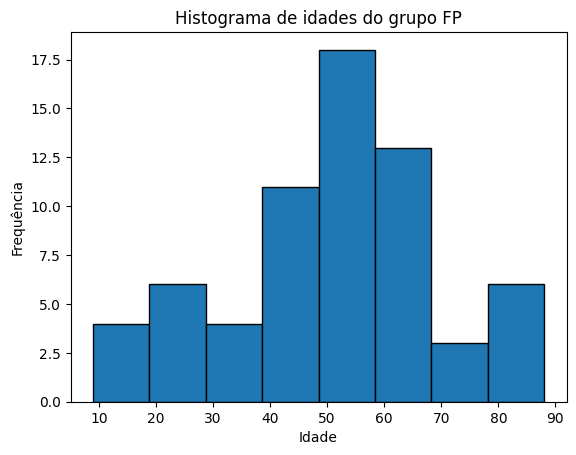

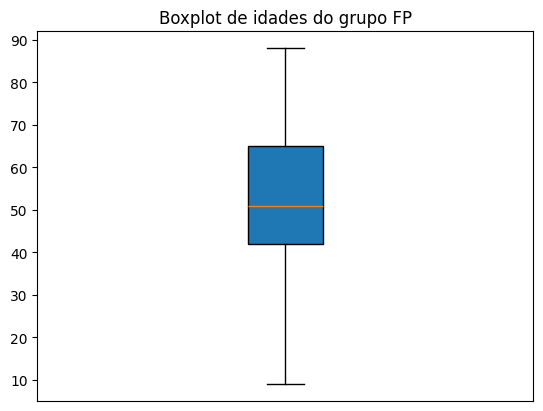

In [93]:
# Análise das idades de FP
# Descrição estatísitca
print(idade_fp.describe())

# Gráfico histograma
plt.hist(idade_fp, bins="auto", edgecolor='black')
plt.title("Histograma de idades do grupo FP")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Gráfico boxplot
plt.boxplot(idade_fp, patch_artist=True)
plt.title("Boxplot de idades do grupo FP")
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

count     56.000000
mean      53.267857
std       18.800862
min       18.000000
25%       39.250000
50%       55.000000
75%       65.250000
max      101.000000
Name: idade, dtype: float64


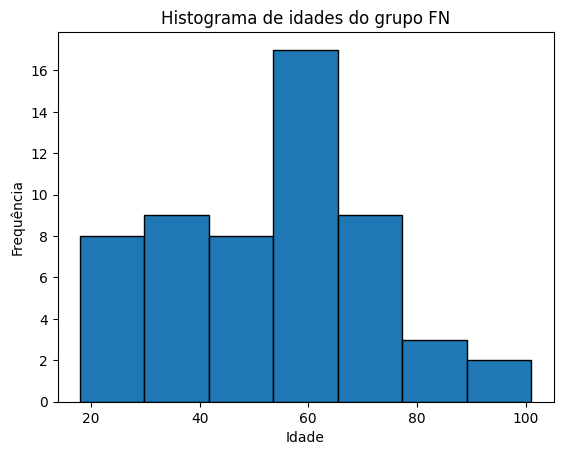

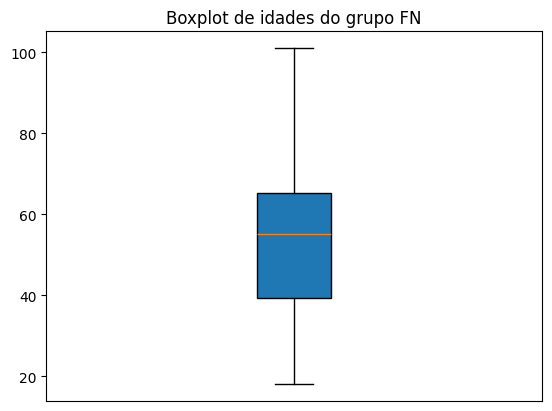

In [94]:
# Análise das idades de FN
# Descrição estatísitca
print(idade_fn.describe())

# Gráfico histograma
plt.hist(idade_fn, bins="auto", edgecolor='black')
plt.title("Histograma de idades do grupo FN")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Gráfico boxplot
plt.boxplot(idade_fn, patch_artist=True)
plt.title("Boxplot de idades do grupo FN")
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

Idades <= 50 em FP: 29
Idades <= 50 em FN: 23
count    65.000000
mean     50.938462
std      18.605171
min       9.000000
25%      42.000000
50%      51.000000
75%      65.000000
max      88.000000
Name: idade, dtype: float64
count     56.000000
mean      53.267857
std       18.800862
min       18.000000
25%       39.250000
50%       55.000000
75%       65.250000
max      101.000000
Name: idade, dtype: float64


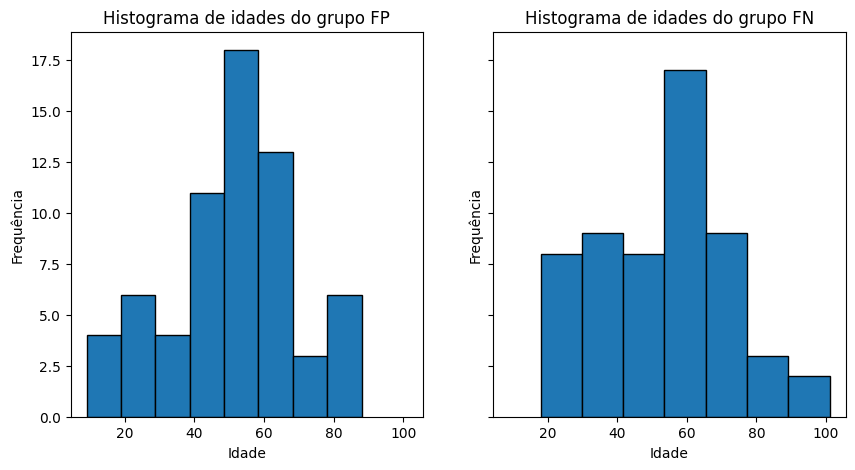

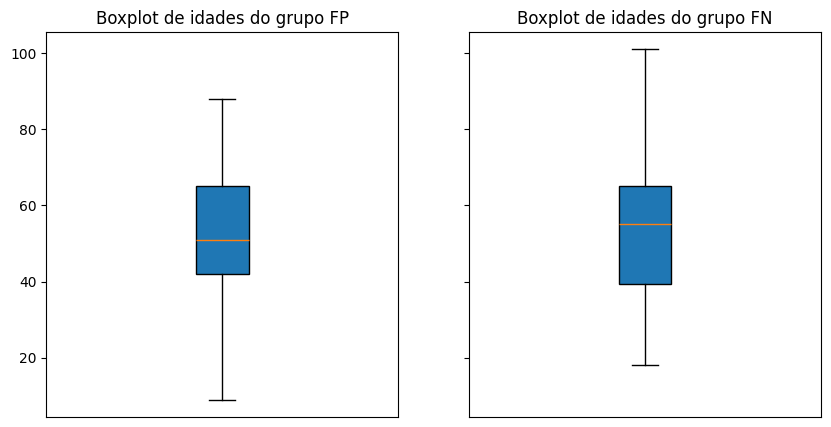

In [95]:
# Comparando FP e FN

print(f"Idades <= 50 em FP: {idade_fp[idade_fp <= 50].count()}")
print(f"Idades <= 50 em FN: {idade_fn[idade_fn <= 50].count()}")
print(idade_fp.describe())
print(idade_fn.describe())

# Gráfico histograma
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
axes[0].hist(idade_fp, bins="auto", edgecolor='black')
axes[0].set_title("Histograma de idades do grupo FP")
axes[0].set_xlabel("Idade")
axes[0].set_ylabel("Frequência")
axes[1].hist(idade_fn, bins="auto", edgecolor='black')
axes[1].set_title("Histograma de idades do grupo FN")
axes[1].set_xlabel("Idade")
axes[1].set_ylabel("Frequência")
plt.show()

# Gráfico boxplot
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axes[0].boxplot(idade_fp, patch_artist=True)
axes[0].set_title("Boxplot de idades do grupo FP")
axes[0].xaxis.set_visible(False)
axes[1].boxplot(idade_fn, patch_artist=True)
axes[1].set_title("Boxplot de idades do grupo FN")
axes[1].xaxis.set_visible(False)
plt.show()

Considerando as comparações apresentadas, observa-se que tanto a média quanto a mediana em FP são menores do que em FN, com desvios padrão semelhantes. Os boxplots indicam um mínimo (de idade) menor em FP do que em FN, e um máximo maior em FN do que em FP. Além disso, 25% dos dados de FP estão concentrados perto de sua mediana (que é menor do que em FN), e 25% dos dados variam do primeiro quartil até o mínimo de FP (que é menor que o mínimo em FN). O intervalo interquartil maior de FN indica uma maior variabilidade dos 50% dados centrais. Pelos histogramas, também pode-se observar uma maior concentração de pessoas mais velhas em FN (~ 55 a 78 anos), com a idade chegando a 100. Já em FP, a concentração fica em torno de 38 a 67 anos. Por fim, uma simples contagem de pessoas com idade menor ou igual a 50 indica um número maior em FP (29) do que em FN (23).
**Conclusão:** O grupo FP é MAIS JOVEM do que o grupo FN.